In [33]:
#Let's see if there are grid cells
import numpy as np
import matplotlib.pyplot as pl

from scipy import io as io
from scipy.ndimage import gaussian_filter
import scipy as sp

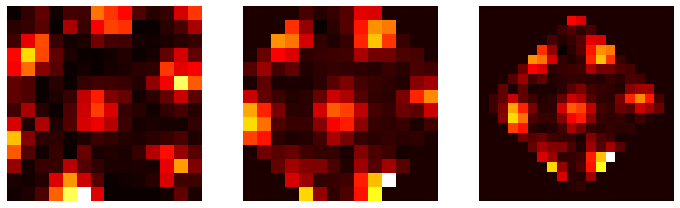

In [34]:
fig = pl.figure(figsize=(10, 3))
>>> ax1, ax2, ax3 = fig.subplots(1, 3)
img = rate
>>> img_45 = ndimage.rotate(img, 45, reshape=False)
>>> full_img_45 = ndimage.rotate(img, 45, reshape=True)
>>> ax1.imshow(img, cmap='hot')
>>> ax1.set_axis_off()
>>> ax2.imshow(img_45, cmap='hot')
>>> ax2.set_axis_off()
>>> ax3.imshow(full_img_45, cmap='hot')
>>> ax3.set_axis_off()
>>> fig.set_tight_layout(True)
>>> pl.show()

In [ ]:
# neural_data = np.random.rand(25000,50) #2500 time points, 50neurons, 1 y/n
# neural_data = np.where(neural_data > 0.8, True, False)

# position_data = np.random.rand(1000,2) #1000 time points, 2xy pos

In [35]:
pos = io.loadmat('10704-07070407_POS.mat')
spk = io.loadmat('10704-07070407_T2C3.mat')
poss = np.vstack((pos["posx"].flatten(), pos["posy"].flatten()))
spkt = spk["cellTS"].flatten()
post = pos["post"].flatten()

In [36]:
def pos_ind_of_spikes(pos_t,value):
    pos_ind_of_spks = (np.abs(pos_t-value)).argmin() #finds indx of min diff btwn spike timestamp+pos timestamp
    return pos_ind_of_spks

def rate_map(poss,spkt,time,bin_width=15):
    #time is the sampling length in pos array
    bin_edge = np.linspace(-50,50,bin_width)
    posx = poss[0]
    posy = poss[1]
    spkt = spkt
    
    pos_ind = [pos_ind_of_spikes(post,t) for t in spkt]
    
    occupation_map = np.histogram2d(posx,posy, bins=(bin_edge,bin_edge))[0]
    activity_map = np.histogram2d(posx[pos_ind],posy[pos_ind], bins=(bin_edge,bin_edge))[0]
    
    rate_map = activity_map/(occupation_map*time)
    
    return rate_map

def plot_rate_map(im, nlabels=5):
    fig = pl.figure(figsize=(6,4))
    pl.imshow(im,interpolation='none',cmap='inferno')
    pl.colorbar(label="Hz")
    pl.xticks(np.linspace(0,len(im),nlabels)-0.5,
              np.linspace(-50,50,nlabels).astype('int'))
    pl.yticks(np.linspace(0,len(im),nlabels)-0.5,
              np.linspace(-50,50,nlabels).astype('int'))
    
    pl.plot(plm(crate,threshold_rel=0.3)[:,1],plm(crate,threshold_rel=0.3)[:,0], '.', color='red')


def path_map(pos,spkt):

    posx = poss[0]
    posy = poss[1]
    spkt = spkt

    pos_ind = [pos_ind_of_spikes(post,t) for t in spkt]

    fig = pl.figure(figsize=(4.1,4.1))
    pl.plot(posx,posy, 'k', lw=0.5)
    pl.plot(posx[pos_ind],posy[pos_ind], '.', color='red')
    
    pl.gca().set_aspect('equal', adjustable='box')
    pl.xlim(-50,50)
    pl.ylim(-50,50)
    pl.xticks([-50,-25,0,25,50])
    pl.yticks([-50,-25,0,25,50])

In [37]:
rate = rate_map(poss,spkt,0.02,bin_width=15)
crate = correlate2d(rate, rate, mode='same', fft=True, normalize=True,
                set_small_values_zero=None)

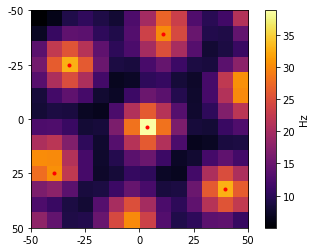

In [42]:
rate = rate_map(poss,spkt,0.02,bin_width=15)
plot_rate_map(crate)

In [ ]:
plm(rate, threshold_rel=0.4, indices = False)

In [ ]:
#smoothing
plot_rate_map(rate)
plot_rate_map(gaussian_filter(rate, 1, mode = 'nearest'))
path_map(poss,spkt)